# Build a Neural Network model for 50_startups data to predict profit 


In [1]:
!pip install feature-engine

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing necessary models for implementation of ANN
from keras.models import Sequential
from keras.layers import Dense #, Activation,Layer,Lambda # dense means how many neurons
from keras.utils import plot_model

Using TensorFlow backend.
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [4]:
a=100
from sklearn.model_selection import train_test_split


In [5]:
startups = pd.read_csv("C:\\Excelr Data\\Assignments\\Neural Networks\\50_Startups.csv")


In [6]:
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
startups = pd.get_dummies(startups)
startups.head(10)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [8]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [9]:
startups.shape

(50, 7)

In [10]:
startups.isnull().sum() # No missing values 

R&D Spend           0
Administration      0
Marketing Spend     0
Profit              0
State_California    0
State_Florida       0
State_New York      0
dtype: int64

In [11]:
startups.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


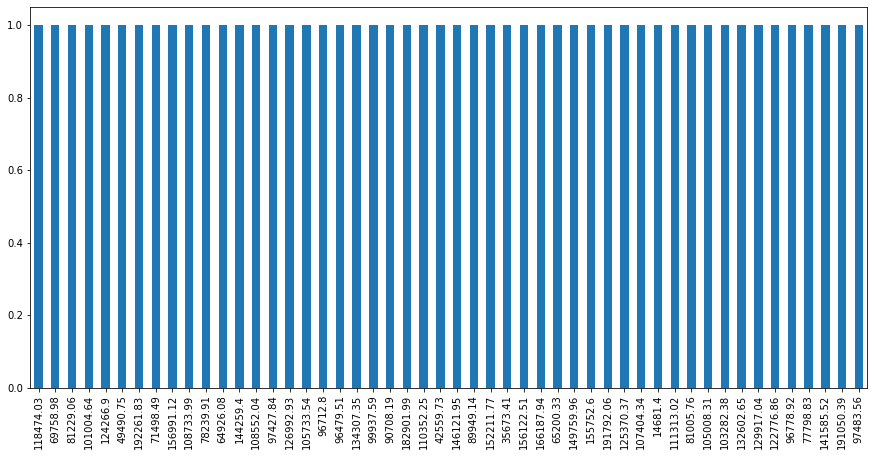

In [12]:
fig = plt.figure(figsize=(15, 7))
startups.Profit.value_counts().plot(kind="bar")


In [13]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    # for the output layer we are not adding any activation function as 
    # the target variable is continuous variable 
    model.add(Dense(hidden_dim[-1]))
    # loss ---> loss function is means squared error to compare the output and estimated output
    # optimizer ---> adam
    # metrics ----> mean squared error - error for each epoch on entire data set 
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["mse"])
    return (model)

In [14]:
column_names = list(startups.columns)
column_names 

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'Profit',
 'State_California',
 'State_Florida',
 'State_New York']

In [15]:
#predictors = column_names[:3,5:7]
predictors =column_names[0:3]+column_names[4:7]
predictors


['R&D Spend',
 'Administration',
 'Marketing Spend',
 'State_California',
 'State_Florida',
 'State_New York']

In [16]:
target = column_names[3]
target

'Profit'

In [17]:
first_model = prep_model([6,50,1])
first_model

In [18]:
first_model.fit(np.array(startups[predictors]),np.array(startups[target]),epochs=30)



Epoch 1/30
50/50 [==============================] - 0s 3ms/step - loss: 14805807185.9200 - mse: 14805807104.0000
Epoch 2/30
50/50 [==============================] - 0s 120us/step - loss: 13982675066.8800 - mse: 13982674944.0000
Epoch 3/30
50/50 [==============================] - 0s 140us/step - loss: 13248695664.6400 - mse: 13248695296.0000
Epoch 4/30
50/50 [==============================] - 0s 121us/step - loss: 12432529981.4400 - mse: 12432530432.0000
Epoch 5/30
50/50 [==============================] - 0s 137us/step - loss: 11681567703.0400 - mse: 11681567744.0000
Epoch 6/30
50/50 [==============================] - 0s 120us/step - loss: 10948830904.3200 - mse: 10948831232.0000
Epoch 7/30
50/50 [==============================] - 0s 133us/step - loss: 10261140766.7200 - mse: 10261140480.0000
Epoch 8/30
50/50 [==============================] - 0s 127us/step - loss: 9579322327.0400 - mse: 9579322368.0000
Epoch 9/30
50/50 [==============================] - 0s 85us/step - loss: 8965021409

In [19]:
pred_train = first_model.predict(np.array(startups[predictors]))
#pred_train

In [20]:
pred_train = pd.Series([i[0] for i in pred_train])
#pred_train

In [21]:
rmse_value = np.sqrt(np.mean((pred_train-startups[target])**2))
rmse_value

28373.125857943156

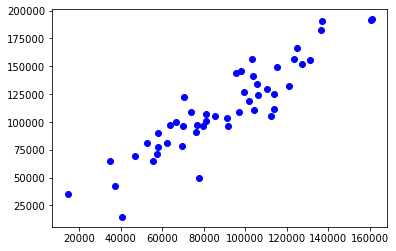

In [22]:
import matplotlib.pyplot as plt
plt.plot(pred_train,startups[target],"bo")


In [23]:
np.corrcoef(pred_train,startups[target]) # we got high correlation 


array([[1.        , 0.90892126],
       [0.90892126, 1.        ]])

In [24]:
pip install nnv

Note: you may need to restart the kernel to use updated packages.


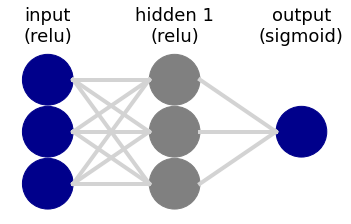

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21b43f54c08>)

In [25]:
from nnv import NNV

layersList = [
    {"title":"input\n(relu)", "units": 3, "color": "darkBlue"},
    {"title":"hidden 1\n(relu)", "units": 3},
    {"title":"output\n(sigmoid)", "units": 1,"color": "darkBlue"},
]

NNV(layersList).render(save_to_file="my_example.png")

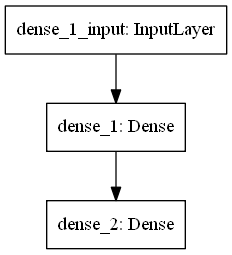

In [26]:
# small picture -  ANN network and its layers 
from keras.utils import plot_model
plot_model(first_model,to_file="first_model.png")
